Basic Statistics:
Total number of entries: 1
Total number of QAs: 4772
Average context length: 1550.46 characters
Average question length: 62.16 characters
Average answer length: 11.31 characters
Missing answers: 0
Number of unique contexts: 2511
--------------------------------------------------
Question Types Analysis:
Distribution of question types:
question
factoid    3975
yes/no      797
Name: count, dtype: int64


C:\Users\siva\AppData\Local\Temp\ipykernel_80184\3655902403.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=question_types, palette="viridis")


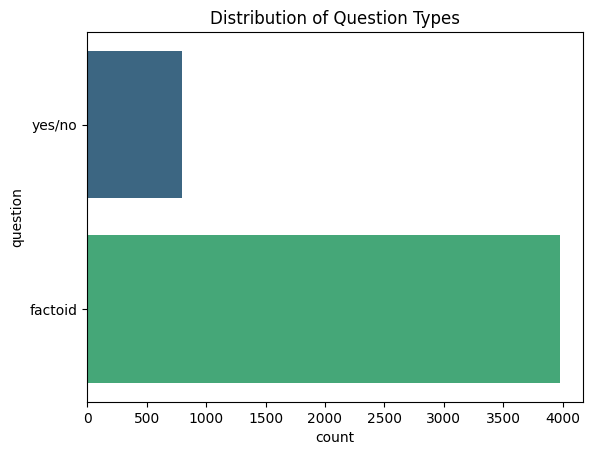

Context Length Distribution:


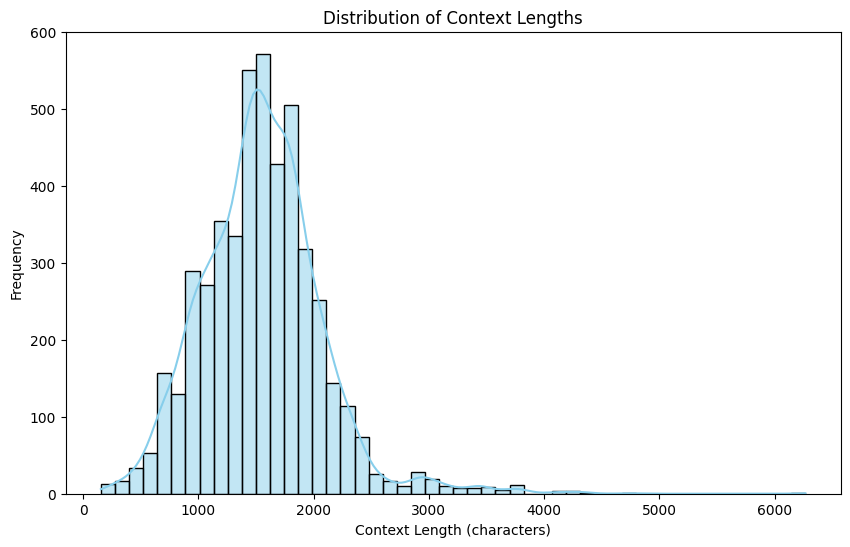

Question Length Distribution:


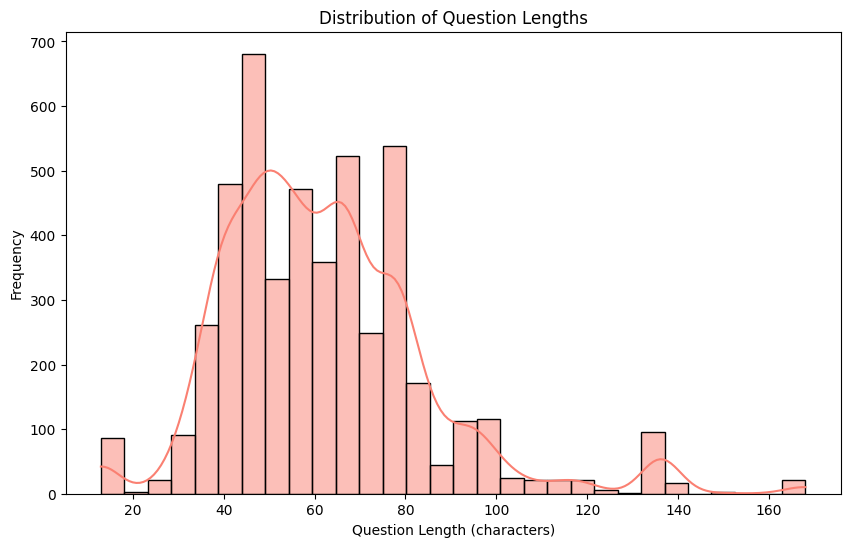

Answer Length Distribution:


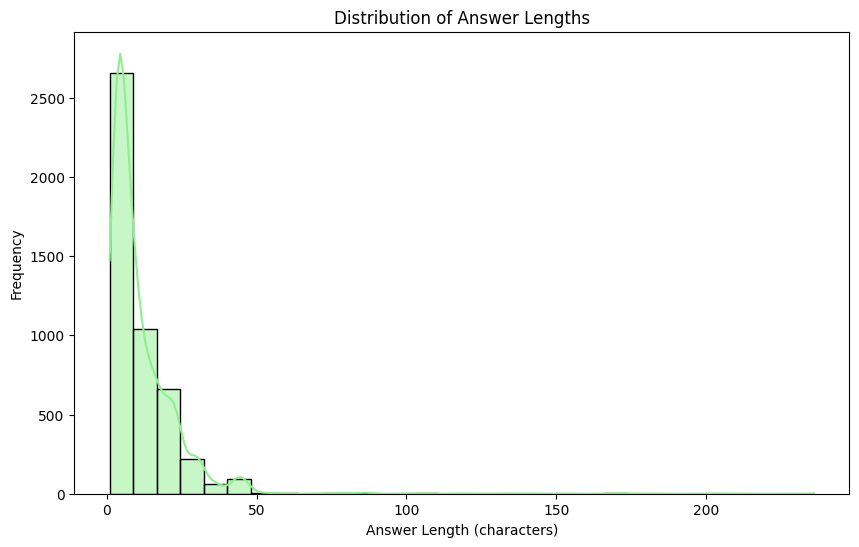

Overlap Analysis:
Percentage of answers found in context: 100.00%


C:\Users\siva\AppData\Local\Temp\ipykernel_80184\3655902403.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['answer_in_context'], palette="muted")


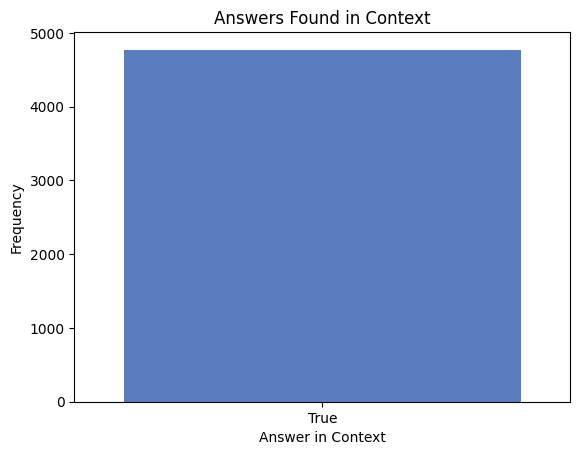

Word Count Distributions:


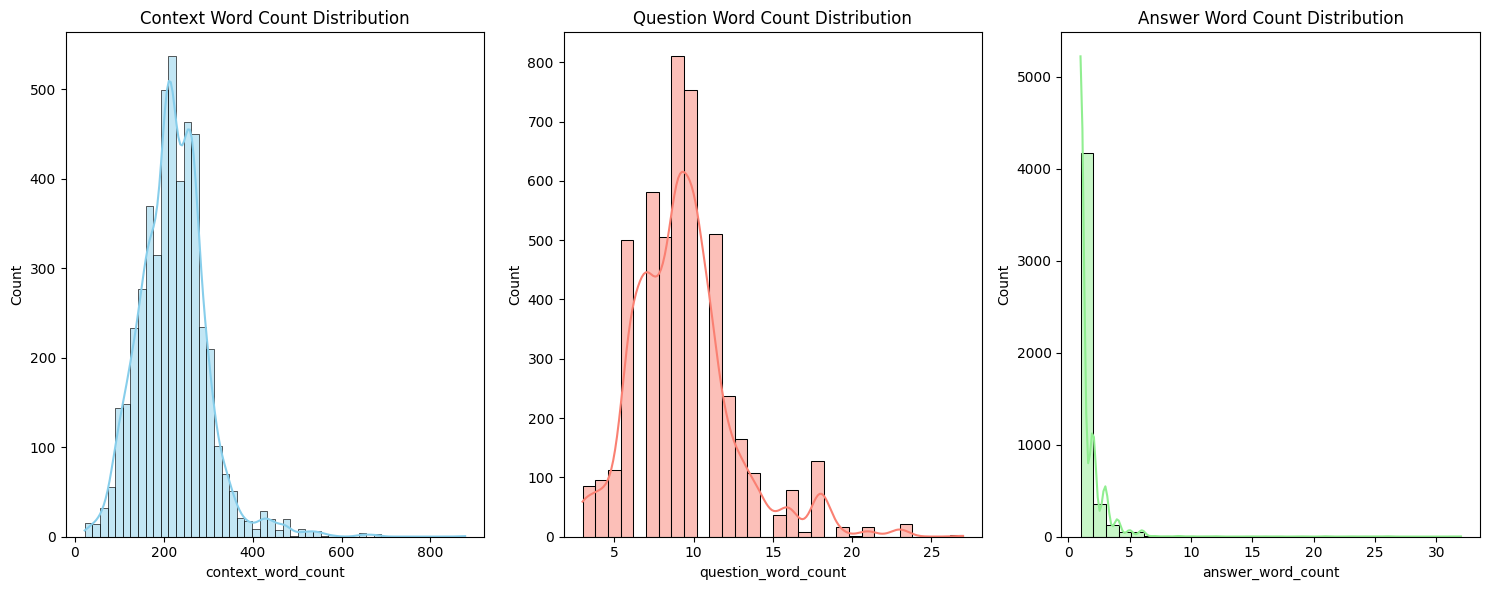

N-gram Analysis (Bigrams) for Questions:


C:\Users\siva\AppData\Local\Temp\ipykernel_80184\3655902403.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_ngrams.index, x=top_ngrams.values, palette="viridis")


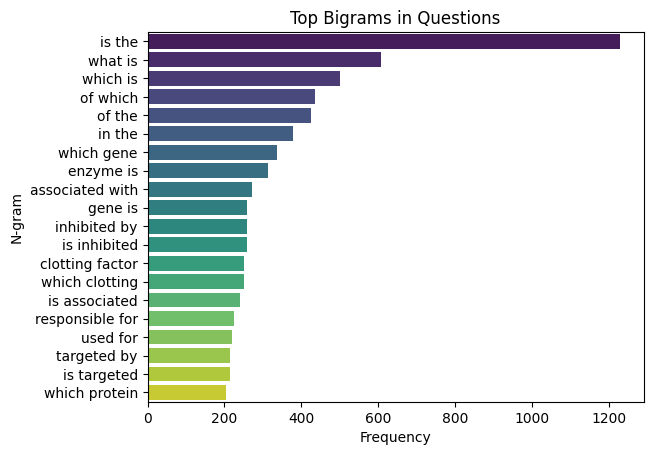

N-gram Analysis (Bigrams) for Contexts:


C:\Users\siva\AppData\Local\Temp\ipykernel_80184\3655902403.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_ngrams.index, x=top_ngrams.values, palette="viridis")


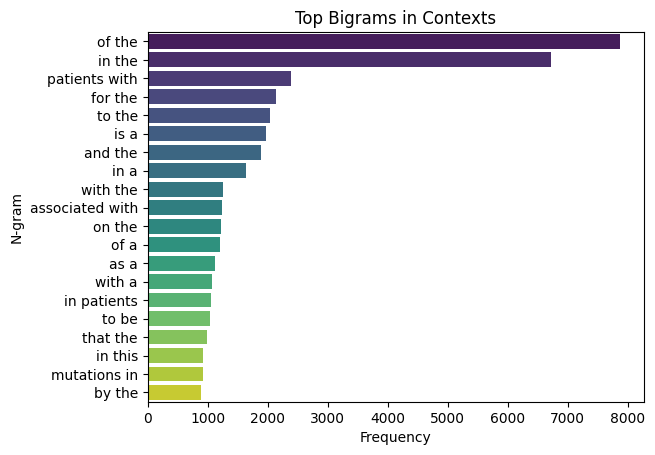

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Step 1: Load the BioASQ-like dataset
def load_bioasq_dataset(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

# Step 2: Perform extensive EDA
def perform_eda_on_bioasq(data):

    df = preprocess_bioasq_data(data)
    
    # 1. Basic statistics
    print("Basic Statistics:")
    print(f"Total number of entries: {len(data['data'])}")
    print(f"Total number of QAs: {df.shape[0]}")
    print(f"Average context length: {df['context'].apply(len).mean():.2f} characters")
    print(f"Average question length: {df['question'].apply(len).mean():.2f} characters")
    print(f"Average answer length: {df['answer'].apply(len).mean():.2f} characters")
    print(f"Missing answers: {df['answer'].isna().sum()}")
    print(f"Number of unique contexts: {df['context'].nunique()}")
    print("-" * 50)

    # 2. Question types analysis
    print("Question Types Analysis:")
    question_types = df['question'].apply(lambda x: "yes/no" if "yes" in x.lower() or "no" in x.lower() else "factoid")
    print(f"Distribution of question types:\n{question_types.value_counts()}")
    sns.countplot(y=question_types, palette="viridis")
    plt.title("Distribution of Question Types")
    plt.show()

    # 3. Context length distribution
    print("Context Length Distribution:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['context'].apply(len), bins=50, kde=True, color="skyblue")
    plt.title('Distribution of Context Lengths')
    plt.xlabel('Context Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    # 4. Question length distribution
    print("Question Length Distribution:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['question'].apply(len), bins=30, kde=True, color="salmon")
    plt.title('Distribution of Question Lengths')
    plt.xlabel('Question Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    # 5. Answer length distribution
    print("Answer Length Distribution:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['answer'].apply(len), bins=30, kde=True, color="lightgreen")
    plt.title('Distribution of Answer Lengths')
    plt.xlabel('Answer Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    # 6. Overlap Analysis: Checking if the answer appears in the context
    print("Overlap Analysis:")
    df['answer_in_context'] = df.apply(lambda row: row['answer'] in row['context'], axis=1)
    print(f"Percentage of answers found in context: {df['answer_in_context'].mean() * 100:.2f}%")
    sns.countplot(x=df['answer_in_context'], palette="muted")
    plt.title("Answers Found in Context")
    plt.xlabel("Answer in Context")
    plt.ylabel("Frequency")
    plt.show()

    # 7. Word and character distributions
    df['context_word_count'] = df['context'].apply(lambda x: len(x.split()))
    df['question_word_count'] = df['question'].apply(lambda x: len(x.split()))
    df['answer_word_count'] = df['answer'].apply(lambda x: len(x.split()))

    print("Word Count Distributions:")
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(df['context_word_count'], bins=50, kde=True, color="skyblue")
    plt.title('Context Word Count Distribution')

    plt.subplot(1, 3, 2)
    sns.histplot(df['question_word_count'], bins=30, kde=True, color="salmon")
    plt.title('Question Word Count Distribution')

    plt.subplot(1, 3, 3)
    sns.histplot(df['answer_word_count'], bins=30, kde=True, color="lightgreen")
    plt.title('Answer Word Count Distribution')
    plt.tight_layout()
    plt.show()

    # 8. N-gram analysis for questions and contexts
    def generate_ngrams(text, n=2):
        tokens = [token for token in text.lower().split(" ") if token != ""]
        n_grams = zip(*[tokens[i:] for i in range(n)])
        return [" ".join(n_gram) for n_gram in n_grams]

    def plot_top_ngrams(corpus, ngram=2, n=20, title="Top N-grams"):
        ngrams = corpus.apply(lambda x: generate_ngrams(x, n=ngram)).explode()
        top_ngrams = ngrams.value_counts().head(n)
        sns.barplot(y=top_ngrams.index, x=top_ngrams.values, palette="viridis")
        plt.title(title)
        plt.xlabel("Frequency")
        plt.ylabel("N-gram")
        plt.show()

    print("N-gram Analysis (Bigrams) for Questions:")
    plot_top_ngrams(df['question'], ngram=2, n=20, title="Top Bigrams in Questions")

    print("N-gram Analysis (Bigrams) for Contexts:")
    plot_top_ngrams(df['context'], ngram=2, n=20, title="Top Bigrams in Contexts")

# Step 3: Preprocess the dataset to extract questions, contexts, and answers
def preprocess_bioasq_data(data):
    questions = []
    contexts = []
    answers = []
    
    for entry in data['data']:
        for paragraph in entry['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question = qa['question']
                answer = qa['answers'][0]['text'] if qa['answers'] else ""
                
                questions.append(question)
                contexts.append(context)
                answers.append(answer)
    
    df = pd.DataFrame({'question': questions, 'context': contexts, 'answer': answers})
    return df

if __name__ == "__main__":
    # Load dataset
    json_path = "datasets/BioASQ-train-factoid-6b-full-annotated.json"
    data = load_bioasq_dataset(json_path)
    
    # Perform EDA
    perform_eda_on_bioasq(data)


In [ ]:
import json
import pandas as pd
import gradio as gr
from langchain import PromptTemplate, LLMChain
from langchain_community.llms import HuggingFacePipeline
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline
from difflib import SequenceMatcher

# Function to load the BioASQ-like dataset
def load_bioasq_dataset(json_path):
    """Load the BioASQ dataset from a JSON file."""
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

# Function to preprocess the dataset to extract questions, contexts, and answers
def preprocess_bioasq_data(data):
    """Preprocess the BioASQ dataset to extract questions, contexts, and answers into a DataFrame."""
    records = []
    
    for entry in data['data']:
        for paragraph in entry['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question = qa['question']
                answer = qa['answers'][0]['text'] if qa['answers'] else ""
                
                records.append({'question': question, 'context': context, 'answer': answer})
    
    return pd.DataFrame(records)

# Function to initialize Hugging Face model and tokenizer, integrate with LangChain
def initialize_langchain_model(model_name="t5-base"):
    """Initialize the Hugging Face model and wrap it with LangChain's HuggingFacePipeline."""
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    hf_pipeline = pipeline("text2text-generation", model=model, tokenizer=tokenizer)
    return HuggingFacePipeline(pipeline=hf_pipeline)

# Function to define the prompt template for the question-answering task
def create_prompt_template():
    """Create a prompt template for question answering with context."""
    template = """
    Given the following context, answer the question.

    Context: {context}

    Question: {question}

    Answer:
    """
    return PromptTemplate(template=template, input_variables=["context", "question"])

# Function to create the LLMChain to manage the process
def create_llm_chain(llm, prompt_template):
    """Create an LLMChain object to manage the question-answering process."""
    return LLMChain(llm=llm, prompt=prompt_template)

# Function to evaluate the correctness of the generated answers
def evaluate_answers(df):
    """Evaluate the correctness of the generated answers using a simple string matching."""
    def is_correct(generated, actual):
        return SequenceMatcher(None, generated.lower(), actual.lower()).ratio() > 0.8
    
    df['is_correct'] = df.apply(lambda row: is_correct(row['generated_answer'], row['answer']), axis=1)
    accuracy = df['is_correct'].mean() * 100
    return accuracy

# Main function to run the pipeline and integrate with Gradio
def run_pipeline(json_path, num_questions):
    """Main function to load data, run the LLMChain, and return results with accuracy."""
    data = load_bioasq_dataset(json_path)
    df = preprocess_bioasq_data(data)
    
    df = df.head(num_questions)
    llm = initialize_langchain_model(model_name="t5-base")
    prompt_template = create_prompt_template()
    llm_chain = create_llm_chain(llm, prompt_template)
    predictions = [
        llm_chain.run({"context": row['context'], "question": row['question']})
        for _, row in df.iterrows()
    ]
    df['generated_answer'] = predictions
    
    accuracy = evaluate_answers(df)
    
    return df[['question', 'context', 'answer', 'generated_answer']], f"Accuracy: {accuracy:.2f}%"

# Function to create the Gradio interface
def create_gradio_interface():
    """Create and launch the Gradio interface for the LLM question-answering pipeline."""
    def gradio_wrapper(json_path, num_questions):
        result_df, accuracy = run_pipeline(json_path, num_questions)
        return result_df, accuracy
    
    gr.Interface(
        fn=gradio_wrapper,
        inputs=[
            gr.Textbox(label="Path to BioASQ JSON Dataset", value="datasets/BioASQ-train-factoid-6b-full-annotated.json"),
            gr.Slider(minimum=1, maximum=50, value=5, label="Number of Questions")
        ],
        outputs=[
            gr.Dataframe(type="pandas", label="Results"),
            gr.Textbox(label="Accuracy")
        ],
        title="BioASQ Question-Answering with LLM",
        description="Load the BioASQ dataset and answer a specified number of questions using a Language Model."
    ).launch()

# Launch the Gradio interface
create_gradio_interface()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


C:\Users\siva\anaconda3\envs\rag\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\siva\anaconda3\envs\rag\lib\site-packages\transformers\generation\utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
C:\Users\siva\anaconda3\envs\rag\lib\site-packages\transformers\generation\utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
C:\Users\siva

In [3]:
import json
import pandas as pd
from langchain import PromptTemplate, LLMChain
from langchain_community.llms import HuggingFacePipeline
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline